In [22]:
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [23]:
df=pd.read_csv('student-mat.csv',delimiter=';')
pd.options.display.max_columns=40

## Processing Data

In [24]:
df.address=(df.address=='R').astype('int')

In [25]:
df=df[['address','famsup','Pstatus','Medu','Fedu','G1','G2','G3']]

In [26]:
df['Pstatus']=(df['Pstatus']=='A').astype('int')

In [27]:
df.famsup=(df.famsup=='no').astype('int')

## Splitting data

In [32]:
x_train.shape

(355, 7)

In [29]:
x=np.array(df.drop(['G3'],axis=1))

In [30]:
y=np.array(df['G3'])

In [31]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=.1)

In [33]:
x_train

array([[ 0,  0,  0, ...,  4, 10,  9],
       [ 0,  1,  1, ...,  4,  7, 10],
       [ 0,  0,  0, ...,  4, 15, 15],
       ...,
       [ 0,  0,  1, ...,  3, 13, 13],
       [ 0,  0,  0, ...,  1, 13, 15],
       [ 0,  1,  0, ...,  2, 11, 11]], dtype=int64)

### Linear regression

In [ ]:
# Line of best fit

In [161]:
y_train

array([ 5, 11, 11, 11, 11, 10, 13, 10, 13,  4, 10, 10,  9, 11, 10, 13,  9,
       12, 11, 10, 12,  0,  0,  9, 18, 10, 10, 10,  8, 14,  9, 13, 14, 19,
       11, 16, 18, 15, 10, 11,  9,  9, 13, 11,  8, 10, 15, 12, 11, 10,  9,
       13, 15, 15, 14,  9,  8, 16,  0,  9,  0, 11, 12, 12,  8,  7, 16, 11,
        9,  0, 10, 11, 11, 10,  9, 18, 19, 12, 11,  9, 14, 10,  7, 15,  9,
        0,  0, 13,  0, 16, 13,  8, 15, 15, 15, 12, 11, 10, 11, 14,  5,  7,
        8, 16, 12, 11, 11,  0,  9, 11, 11, 12, 12,  0, 11,  8, 16, 10,  7,
       12, 17, 11, 14, 11,  0,  8, 12, 15, 15,  0,  6,  0, 14,  9, 10, 18,
       10, 10, 14, 15, 10, 16, 14, 18,  0,  0, 18, 12, 10, 10, 13, 14,  0,
        8,  8, 16, 10, 10,  6, 12, 13, 11, 15, 12,  7,  0, 14,  6, 14, 15,
       15,  7,  8, 15, 10, 10, 12, 13, 18, 19,  9, 11,  6, 17, 13, 16, 14,
       11,  8, 16,  8, 10,  0, 12, 13,  6, 10,  0,  6, 18, 17, 13, 14, 12,
       13, 11,  5, 10, 13, 10,  0,  8, 11,  8,  5, 15, 12,  6, 15, 15, 15,
       10, 14,  6,  0,  9

In [34]:
lm=linear_model.LinearRegression()
lt=lm.fit(x_train,y_train)

acc=lt.score(x_test,y_test)

# constants
lt.coef_
lt.intercept_

# predictions
# pred=lt.predict(x_test)
# for i in range(len(pred)):
#     print(pred[i],x_test[i],y_test[i])



-1.79480670219038

## Saving Models

In [13]:
import pickle

In [58]:
with open('studentpred.pickle','wb') as f:
    pickle.dump(lt,f)

In [59]:
pickle_in=open('studentpred.pickle','rb')

In [60]:
linear=pickle.load(pickle_in)

#### Saving the best version of the model

In [14]:
best=0
for _ in range(100):
    x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=.1)
    lm=linear_model.LinearRegression()
    lt=lm.fit(x_train,y_train)
    
    acc=lt.score(x_test,y_test)
    print(acc)
    if acc> best:
        best=acc
        with open('studentpred.pickle','wb') as f:
            pickle.dump(lt,f)
        


0.8051666202582369
0.6591419516160656
0.8667294445142015
0.8273949355430255
0.7842664710217674
0.8018596626832981
0.8491559050119534
0.8414035306306494
0.8313069126715511
0.7422837900873074
0.6791532658035133
0.8572771450814927
0.8334426889138198
0.7805998016780314
0.7102968373198114
0.8497160663386848
0.7374781791614893
0.8631097930907853
0.8407890569901264
0.8020531474376429
0.7480862326083635
0.8228292515327751
0.8668123059829265
0.8218028173753279
0.8311255488621809
0.9264294920663626
0.8464700856804007
0.9084092541841512
0.7196187508452302
0.8489793025383141
0.8635305700750047
0.7181979378840926
0.9282325206786305
0.7671896503905541
0.8237061859502677
0.8043904084645364
0.7761030461670402
0.8078812669141185
0.8468592142230607
0.6368233109290389
0.8297077831980897
0.7814799923232413
0.7796690864898879
0.8517901617266821
0.8326373420862382
0.5378600505816309
0.8531965567825673
0.9607200813454696
0.8193645371148139
0.7877499154697296
0.7536311980562351
0.9092632790319722
0.9380299096

### Plotting

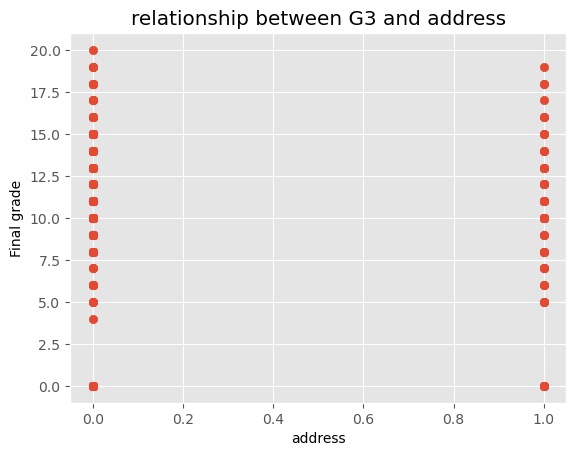

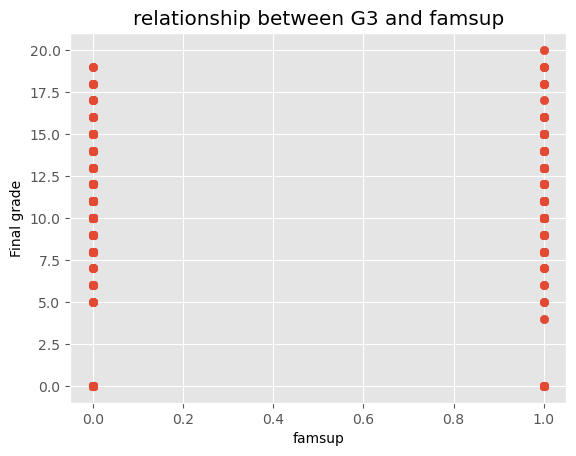

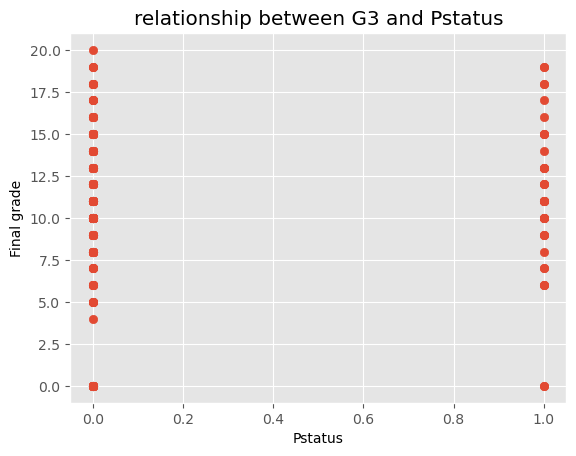

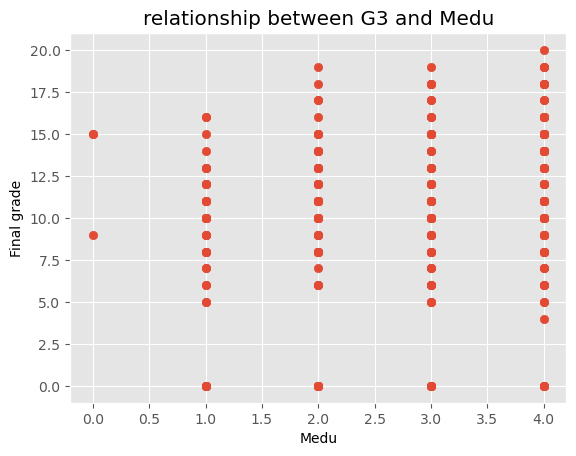

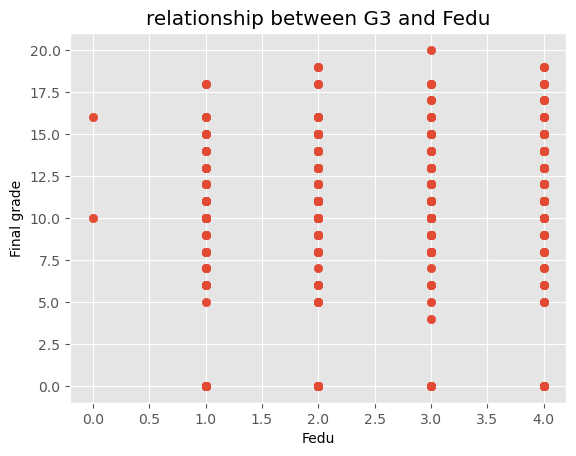

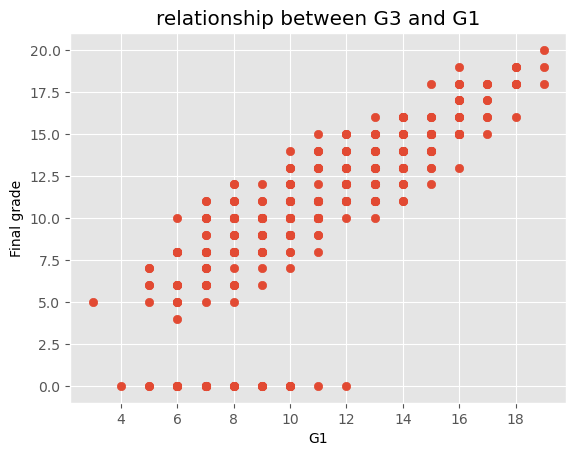

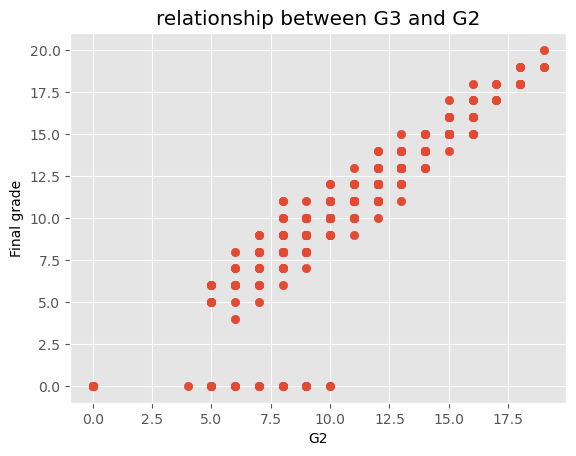

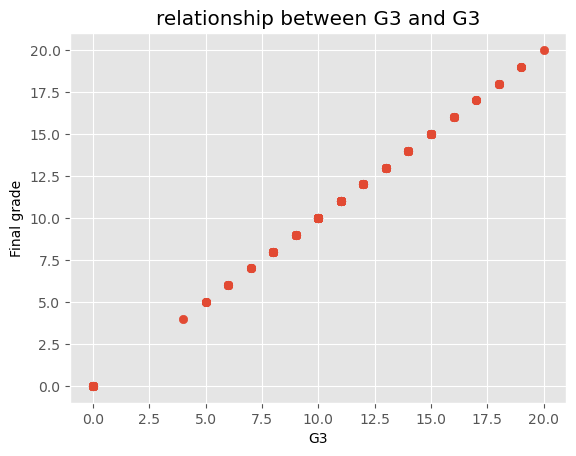

In [25]:
import matplotlib as mpt
mpt.style.use('ggplot')
for i in df.columns:
    plt.scatter(x=df[i],y=df['G3'])
    plt.ylabel('Final grade')
    plt.xlabel(i)
    plt.title(f'relationship between G3 and {i}')
    plt.show()

## Knn

In [10]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing

In [3]:
import pandas as pd

In [5]:
car=pd.read_csv('car.data',names=['Buying','Maint','Door','Persons','Lug_boot','Safety','Class'])

In [6]:
# converting strings to numerical data
proc= preprocessing.LabelEncoder()
byg=proc.fit_transform(list(car['Buying']))
mnt=proc.fit_transform(list(car['Maint']))
sfty=proc.fit_transform(list(car['Safety']))
drs=proc.fit_transform(list(car['Door']))
per=proc.fit_transform(list(car['Buying']))
lb=proc.fit_transform(list(car['Lug_boot']))
cls=proc.fit_transform(list(car['Class']))

In [7]:
# classifying data
x=list(zip(byg,mnt,sfty,drs,per,lb))
y=list(cls)

In [11]:
# splitting data
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=.1)

In [12]:
predict='Class'

In [14]:
x_train

[(1, 1, 2, 0, 1, 1),
 (1, 1, 2, 0, 1, 0),
 (0, 2, 1, 0, 0, 0),
 (2, 3, 0, 1, 2, 0),
 (2, 3, 0, 1, 2, 1),
 (0, 0, 1, 2, 0, 0),
 (2, 3, 2, 0, 2, 2),
 (1, 3, 1, 0, 1, 1),
 (2, 0, 1, 1, 2, 0),
 (3, 0, 0, 1, 3, 1),
 (1, 1, 2, 3, 1, 2),
 (3, 3, 1, 2, 3, 2),
 (3, 3, 0, 2, 3, 1),
 (2, 1, 1, 0, 2, 2),
 (3, 2, 0, 1, 3, 0),
 (2, 1, 2, 3, 2, 1),
 (3, 3, 1, 0, 3, 0),
 (2, 0, 2, 0, 2, 2),
 (3, 1, 0, 2, 3, 2),
 (1, 1, 1, 2, 1, 2),
 (0, 3, 2, 3, 0, 1),
 (3, 2, 0, 2, 3, 1),
 (0, 1, 0, 1, 0, 0),
 (3, 3, 2, 1, 3, 2),
 (0, 2, 2, 1, 0, 0),
 (3, 1, 0, 2, 3, 0),
 (3, 2, 2, 0, 3, 1),
 (2, 0, 0, 3, 2, 2),
 (2, 3, 1, 2, 2, 1),
 (0, 0, 1, 1, 0, 1),
 (0, 2, 0, 3, 0, 2),
 (0, 2, 2, 0, 0, 1),
 (0, 2, 1, 1, 0, 1),
 (0, 3, 1, 0, 0, 2),
 (0, 1, 2, 3, 0, 0),
 (1, 2, 0, 1, 1, 2),
 (3, 0, 2, 3, 3, 2),
 (2, 3, 0, 3, 2, 1),
 (0, 0, 1, 2, 0, 1),
 (1, 0, 1, 1, 1, 1),
 (3, 2, 0, 3, 3, 0),
 (0, 1, 2, 3, 0, 0),
 (2, 1, 2, 2, 2, 0),
 (2, 1, 1, 0, 2, 2),
 (0, 3, 1, 2, 0, 0),
 (3, 0, 2, 3, 3, 0),
 (3, 1, 0, 1, 3, 1),
 (2, 1, 1, 3,

In [13]:
km=KNeighborsClassifier(n_neighbors=23)
km.fit(x_train,y_train)
acc=km.score(x_test,y_test)

In [10]:
import pickle

In [44]:
score=0
for i in range(300):
    x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=.1)
    kt=km.fit(x_train,y_train)
    acc=kt.score(x_test,y_test)
    print(acc)
    if acc>score:
        score=acc
        with open('cars.pickle','wb') as f:
            pickle.dump(kt,f)
        

0.7341040462427746
0.6994219653179191
0.7052023121387283
0.7283236994219653
0.7225433526011561
0.6589595375722543
0.6820809248554913
0.6936416184971098
0.7456647398843931
0.6647398843930635
0.6242774566473989
0.6763005780346821
0.6763005780346821
0.7109826589595376
0.6994219653179191
0.6589595375722543
0.7109826589595376
0.6994219653179191
0.6994219653179191
0.6416184971098265
0.653179190751445
0.7283236994219653
0.7052023121387283
0.6878612716763006
0.6763005780346821
0.6878612716763006
0.6705202312138728
0.7052023121387283
0.7225433526011561
0.5895953757225434
0.6936416184971098
0.6936416184971098
0.653179190751445
0.7167630057803468
0.6647398843930635
0.6878612716763006
0.7341040462427746
0.7109826589595376
0.7398843930635838
0.7167630057803468
0.7225433526011561
0.6763005780346821
0.6647398843930635
0.6705202312138728
0.7514450867052023
0.6878612716763006
0.7225433526011561
0.6763005780346821
0.6763005780346821
0.8034682080924855
0.7225433526011561
0.6473988439306358
0.676300578034

In [65]:
pred_kn=kt.predict(x_test)
names=['unacc','acc','good','vgood']
for i in range(len(pred)):
#     print(names[pred_kn[i]],x_test[i],names[y_test[i]])
    n=km.kneighbors(X=[x_test[i]],n_neighbors= 3,return_distance=True)
    print(f"N: {n}")
        


N: (array([[0., 0., 0.]]), array([[1136,  163, 1068]], dtype=int64))
N: (array([[0., 0., 0.]]), array([[689, 261, 484]], dtype=int64))
N: (array([[0., 0., 0.]]), array([[427, 646, 220]], dtype=int64))
N: (array([[0., 1., 1.]]), array([[1455,   99,  230]], dtype=int64))
N: (array([[0., 0., 0.]]), array([[622, 144, 119]], dtype=int64))
N: (array([[0., 0., 0.]]), array([[1452, 1460,  175]], dtype=int64))
N: (array([[0., 0., 1.]]), array([[ 87, 605, 695]], dtype=int64))
N: (array([[0., 0., 0.]]), array([[1536,  267, 1324]], dtype=int64))
N: (array([[0., 0., 0.]]), array([[ 901,  891, 1248]], dtype=int64))
N: (array([[0., 0., 0.]]), array([[1369, 1396,  162]], dtype=int64))
N: (array([[0., 0., 0.]]), array([[1168,  307,  524]], dtype=int64))
N: (array([[0., 0., 0.]]), array([[1175, 1242,  388]], dtype=int64))
N: (array([[0., 0., 0.]]), array([[1331,  452,  707]], dtype=int64))
N: (array([[0., 0., 1.]]), array([[1413, 1258,  818]], dtype=int64))
N: (array([[0., 0., 0.]]), array([[ 572,  873,

## Support Vector Machine

In [10]:
from sklearn import svm
from sklearn import datasets
from sklearn import metrics

In [11]:
cancer=datasets.load_breast_cancer()

In [12]:
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [13]:
x=cancer.data
y=cancer.target

In [16]:
import sklearn

In [17]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=.2)

In [81]:
cls=['malignant','benign']

[0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1
 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1
 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1
 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1
 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0
 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 1 1]


In [87]:

par=['linear','poly','sigmoid','rbf']
for i in par:
    st=svm.SVC(kernel=i)
    st=st.fit(x_train,y_train)
    pred_st=st.predict(x_test)
    acc=metrics.accuracy_score(y_test,pred_st)
    print(acc)
        

0.9912280701754386
0.9385964912280702
0.41228070175438597
0.9473684210526315


In [99]:
kn=KNeighborsClassifier(7)
kt=kn.fit(x_train,y_train)

pred_kt=kt.predict(x_test)

metrics.accuracy_score(y_test,pred_kt)

0.956140350877193

## K Means

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn import metrics

In [2]:
digits=load_digits()
data=scale(digits.data)
y=digits.target
x=data

In [7]:
digits.data.shape

(1797, 64)

In [18]:
k=len(np.unique(y))

In [19]:
samples,features=data.shape

In [20]:
features

64

In [21]:
def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean')))

In [34]:
clf=KMeans(n_clusters=k,init='k-means++',n_init=10)
bench_k_means(clf,'1',data)

1        	69681	0.682	0.721	0.701	0.572	0.698	0.148


## Tensorflow

In [1]:
import tensorflow
from tensorflow import keras

In [2]:
data= keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels), (test_images,test_labels) = data.load_data()

In [10]:
train_images[7].shape

(28, 28)

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
train_labels.shape

(60000,)

In [5]:
train_labels[10]

0

In [6]:
class_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:
#scaling
train_images=train_images/255.0
test_images=test_images/255.0

In [29]:
plt.imshow(train_images[7],cmap=plt.cm.binary)
plt.show()

NameError: name 'plt' is not defined

In [31]:
import numpy as np

In [33]:
train_images.shape

(60000, 28, 28)

In [32]:
np.shape(test_labels)

(10000,)

In [23]:
n_m=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'), #hidden layer
    keras.layers.Dense(10,activation='softmax') #output layer
    
])
n_m.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
n_m.fit(train_images,train_labels,epochs=10) #training

test_loss,test_acc=n_m.evaluate(test_images,test_labels) # testing

print('accuracy: ',test_acc,'loss: ',test_loss)

Epoch 1/10
1875/1875 [==============================] - 13s 3ms/step - loss: 0.5016 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3731 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3343 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3100 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2923 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2780 - accuracy: 0.8976
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2650 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2542 - accuracy: 0.9063
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2465 - accuracy: 0.9068
Epoch 10/10
313/313 [==============================] - 2s 2ms/step - loss: 0.3230

### Making Predictions

In [11]:
predictions=n_m.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [12]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

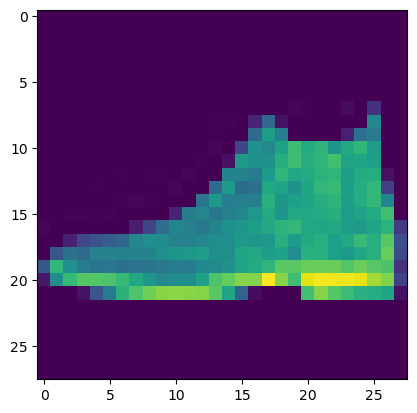

In [13]:
plt.imshow(test_images[0])

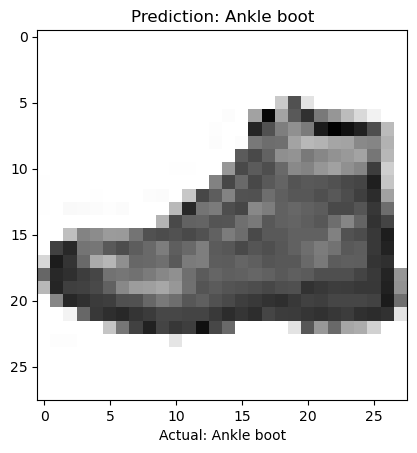

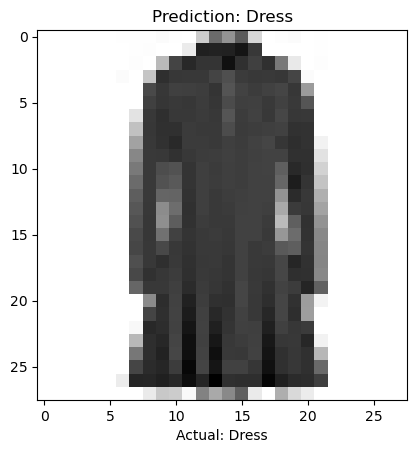

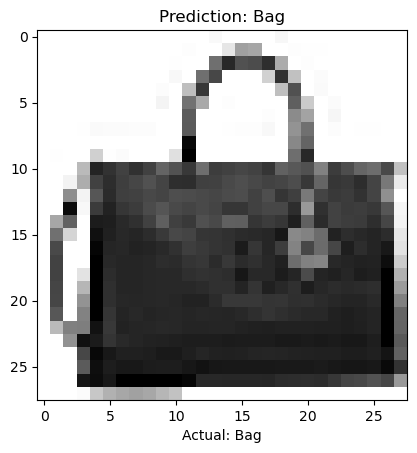

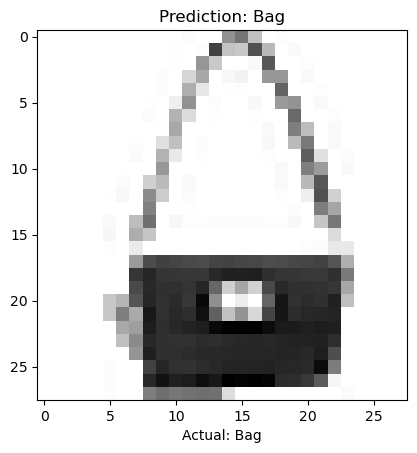

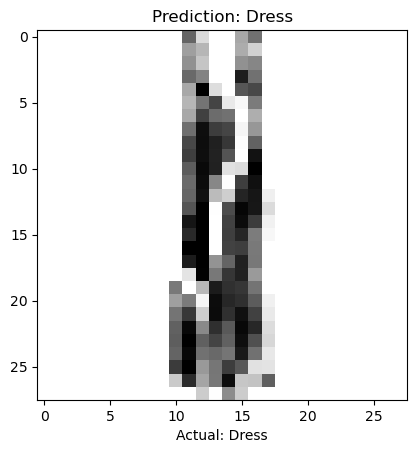

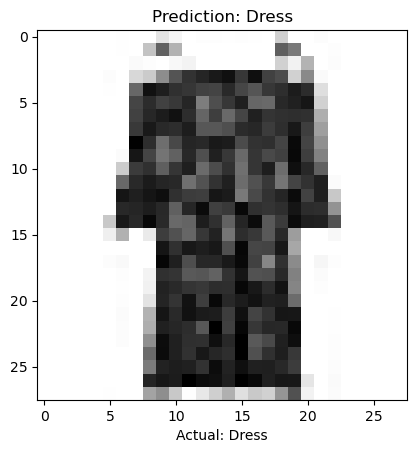

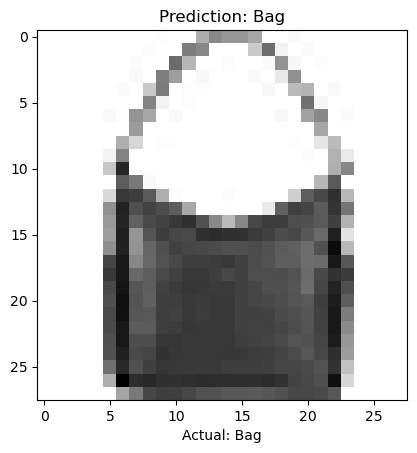

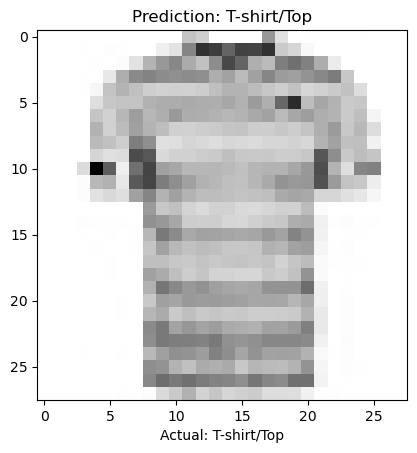

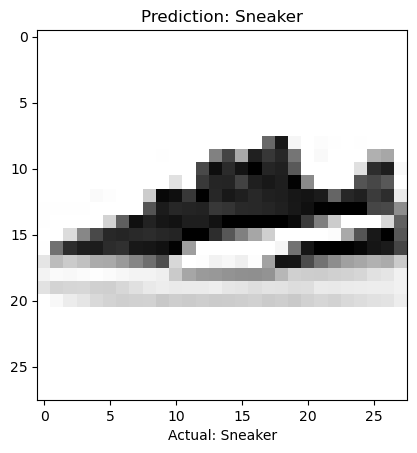

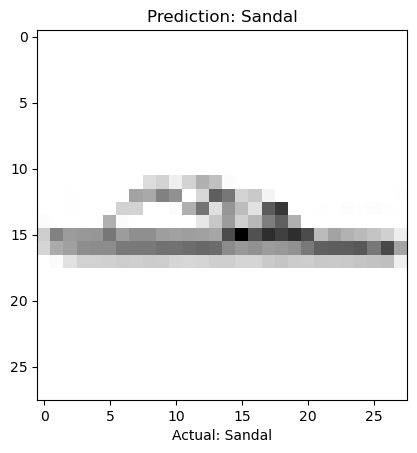

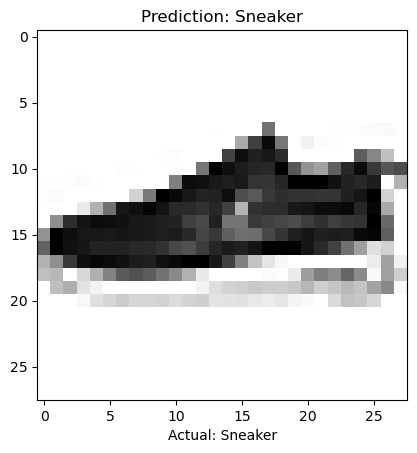

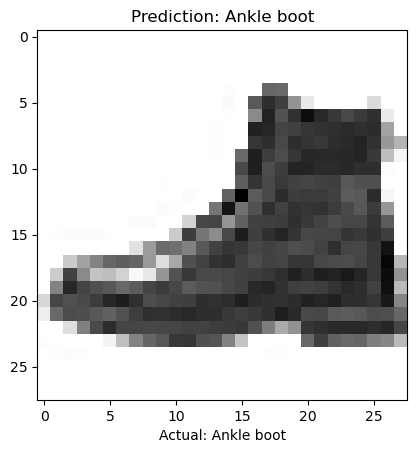

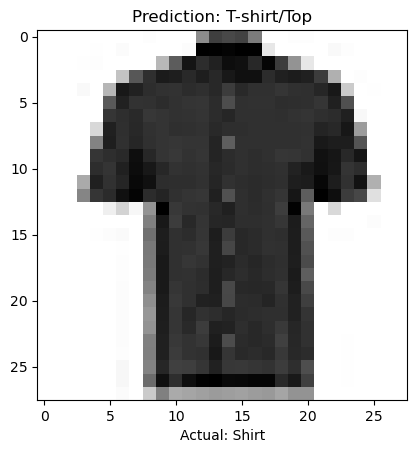

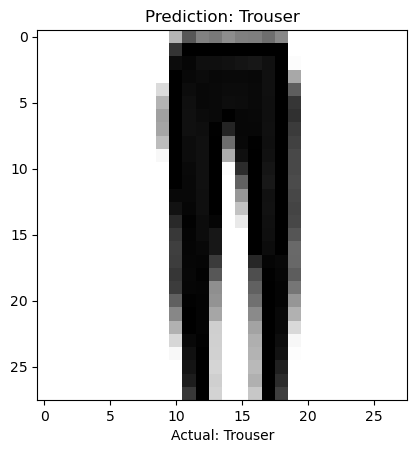

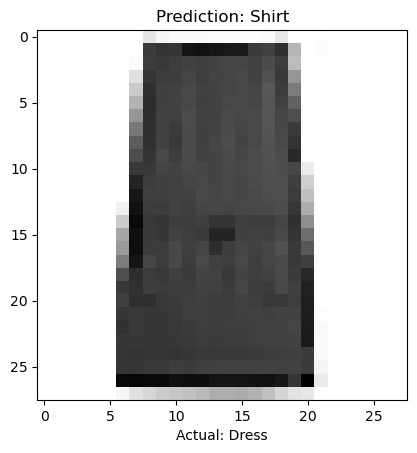

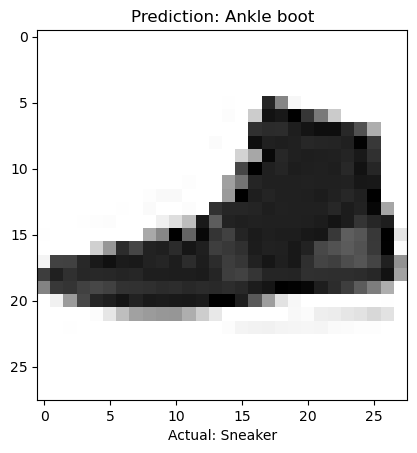

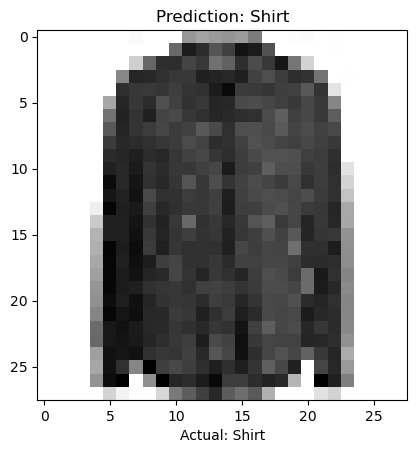

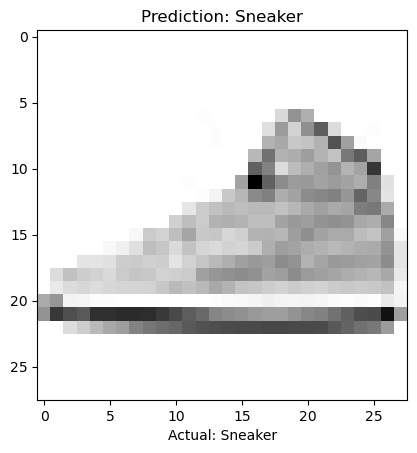

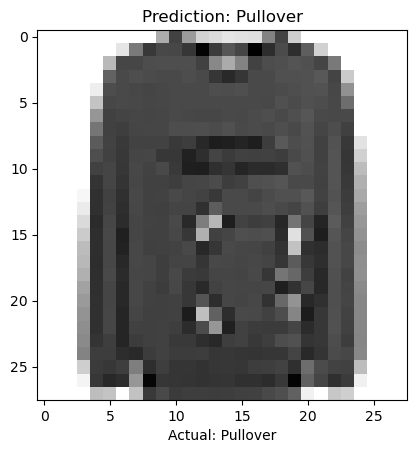

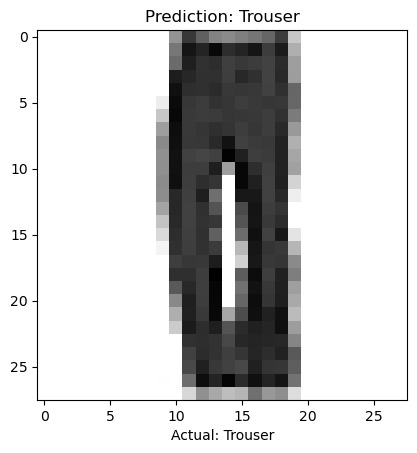

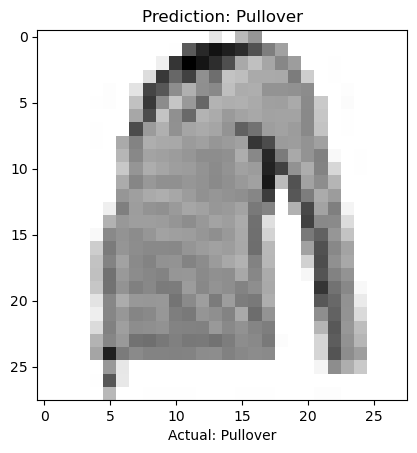

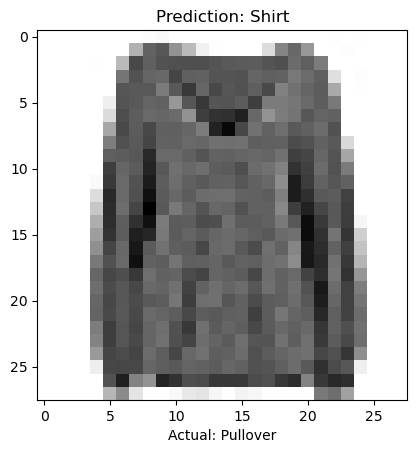

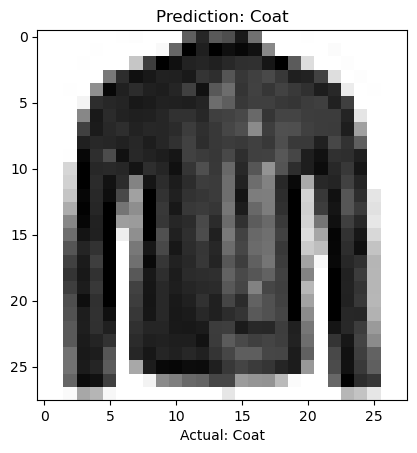

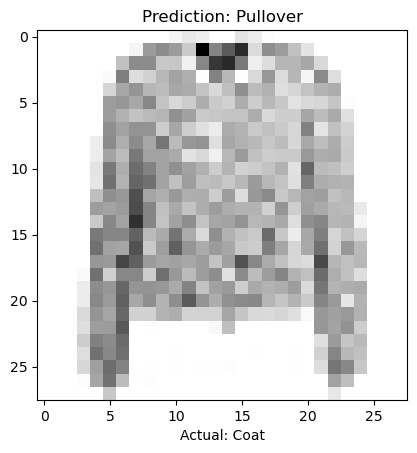

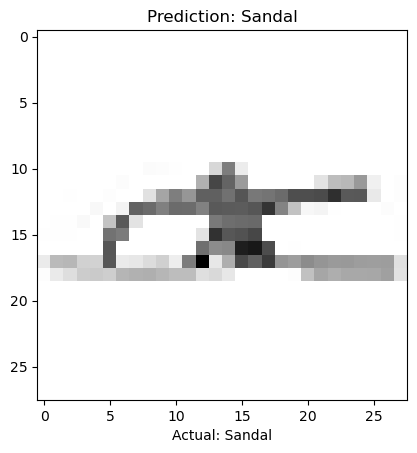

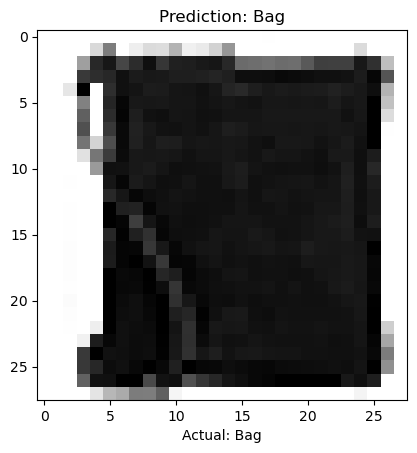

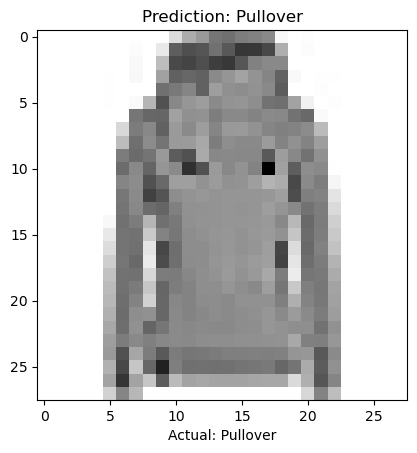

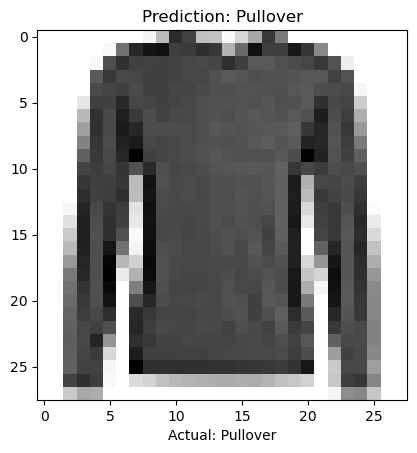

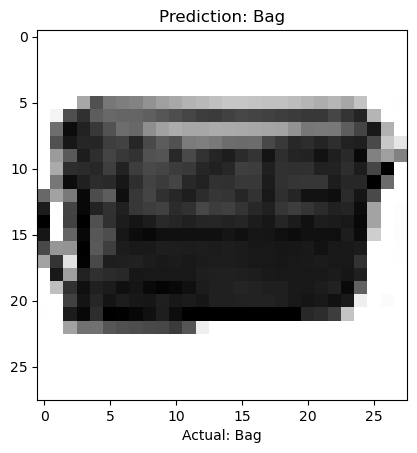

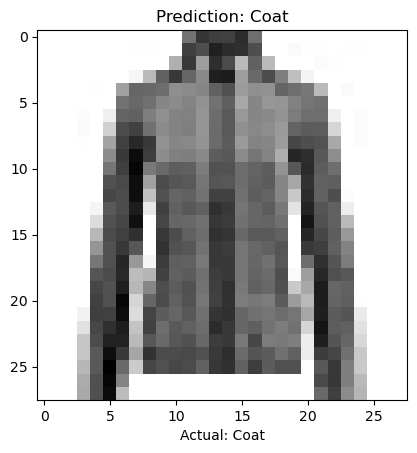

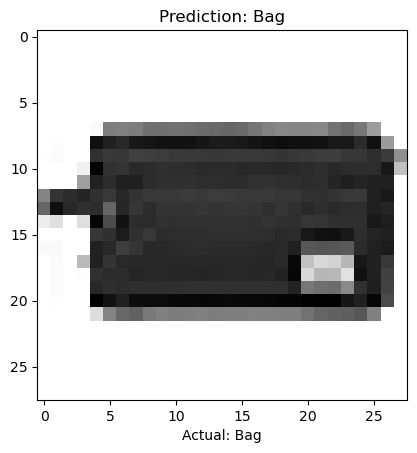

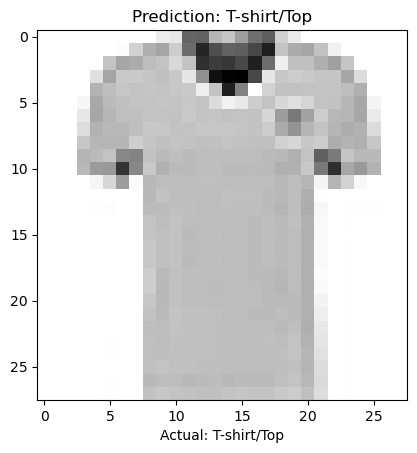

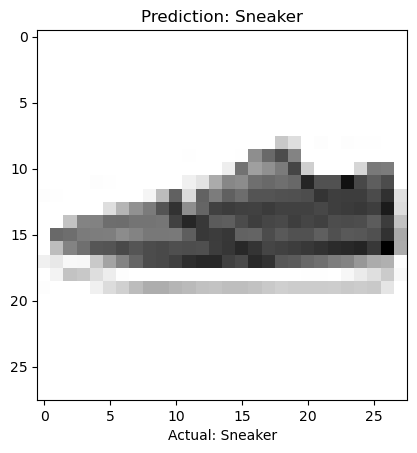

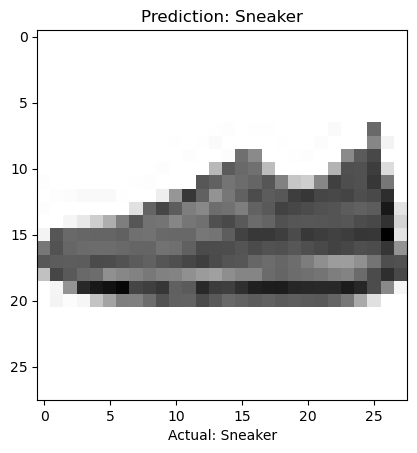

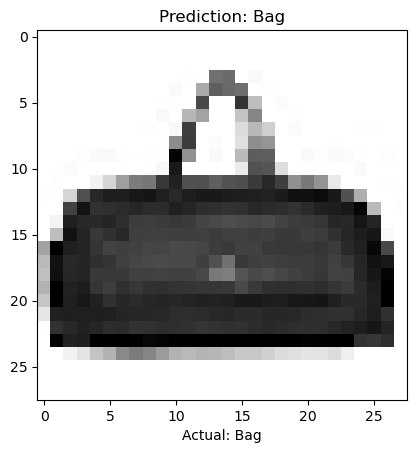

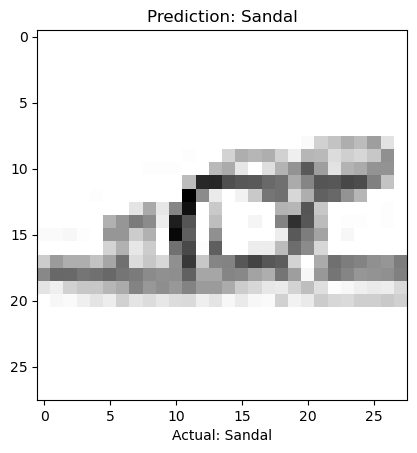

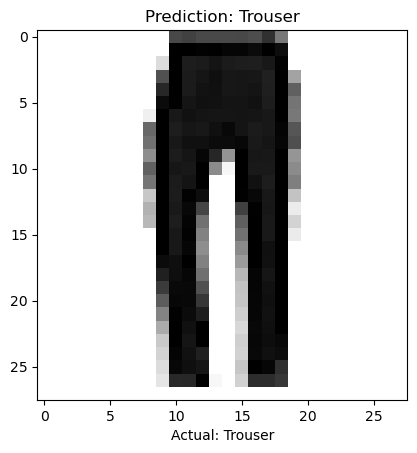

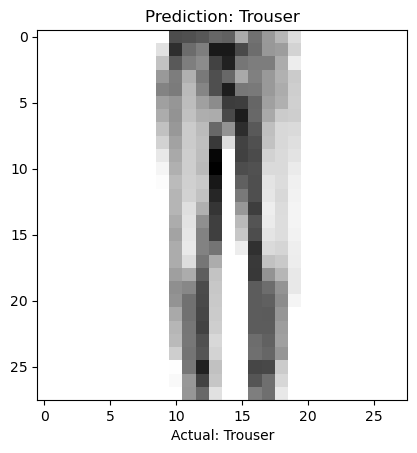

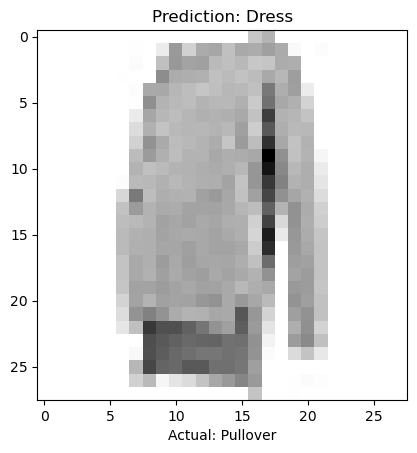

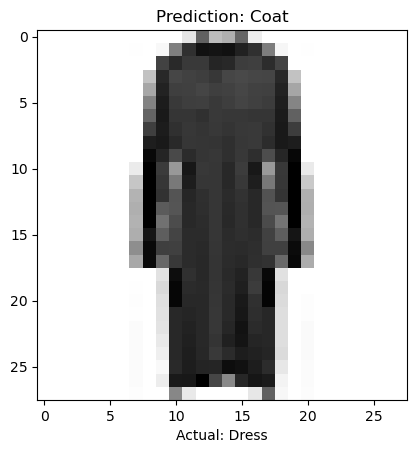

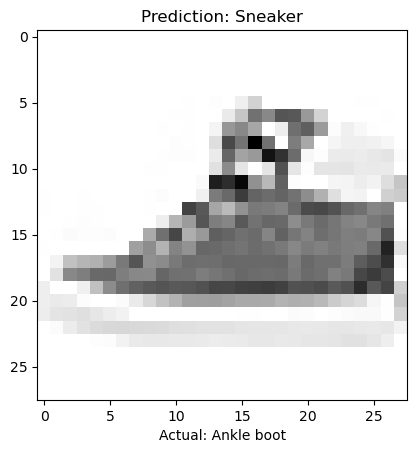

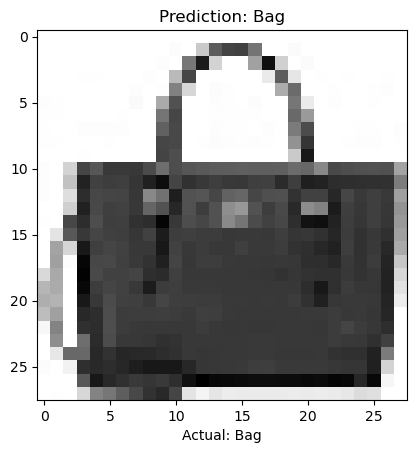

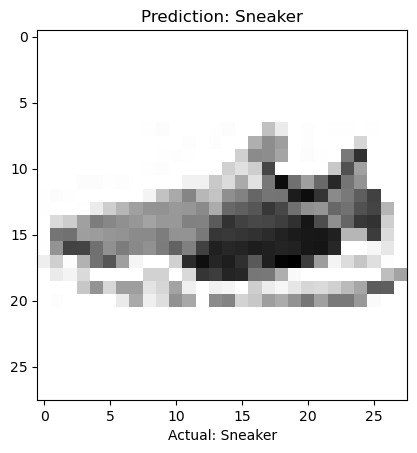

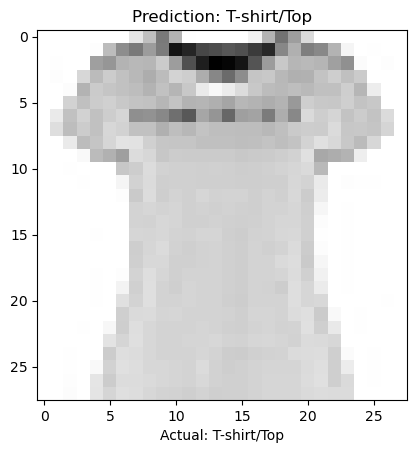

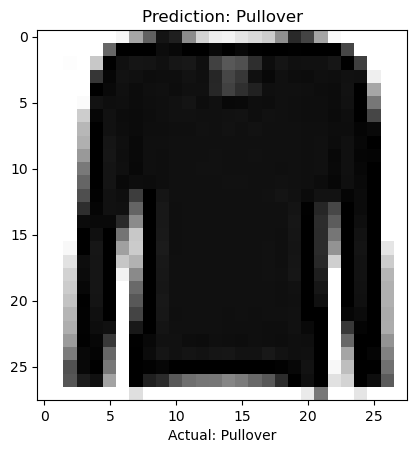

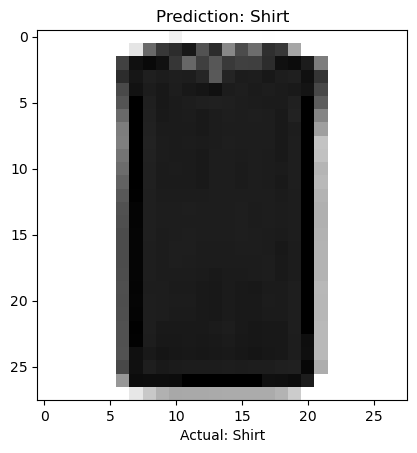

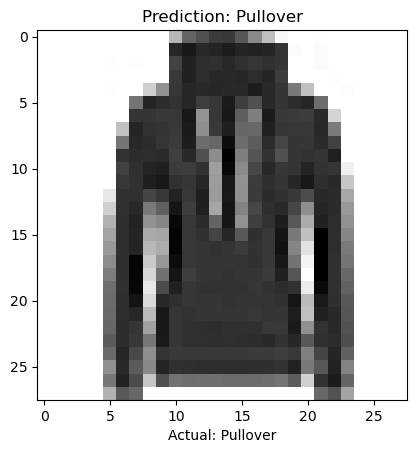

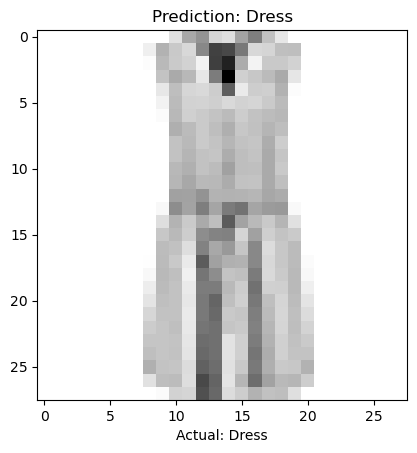

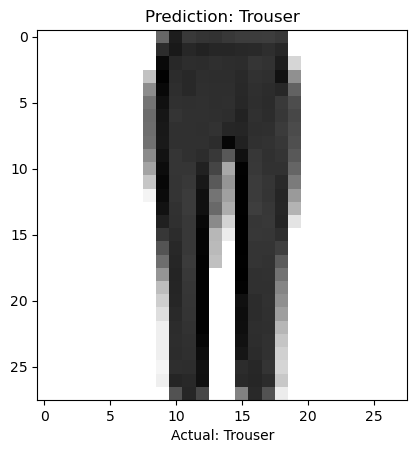

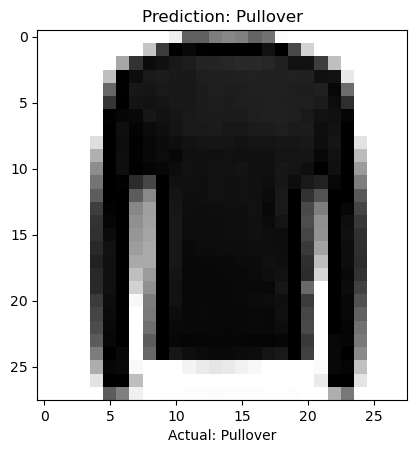

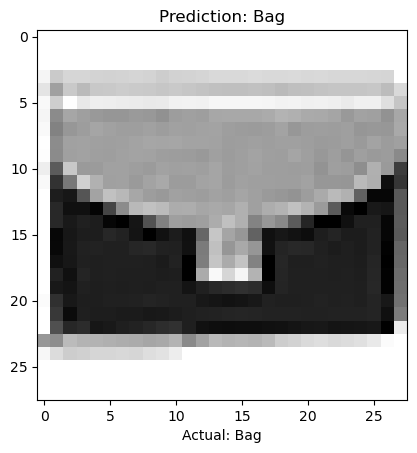

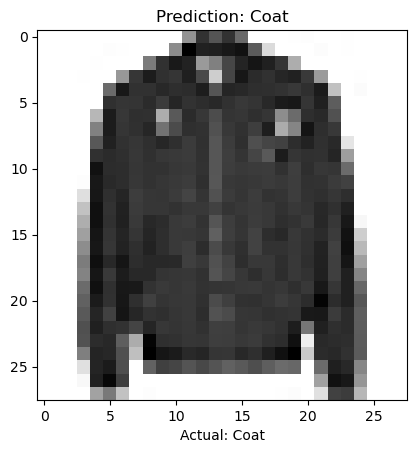

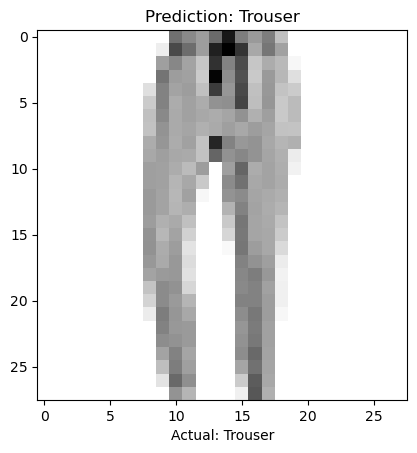

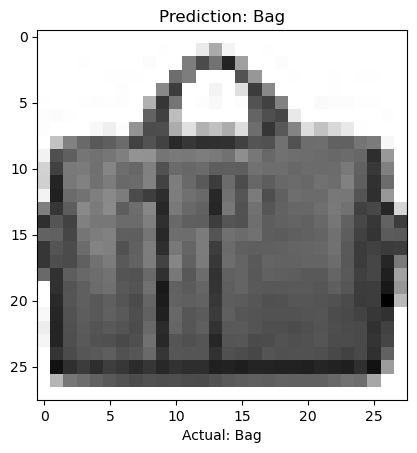

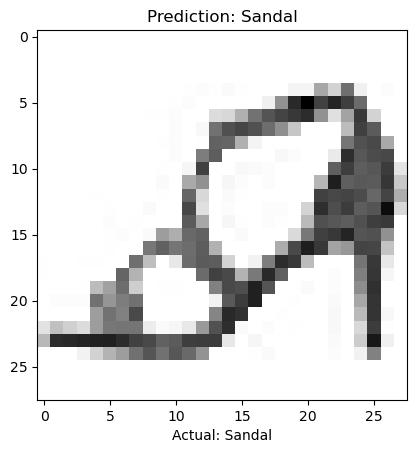

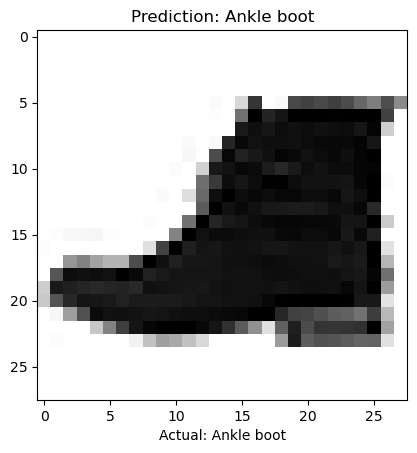

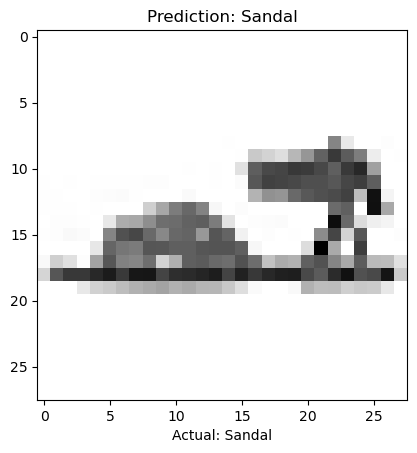

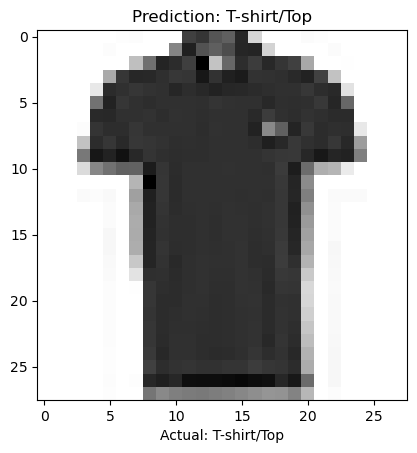

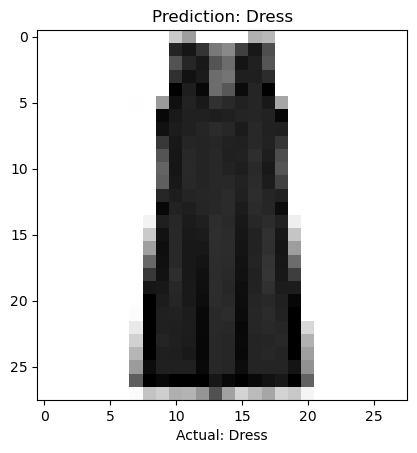

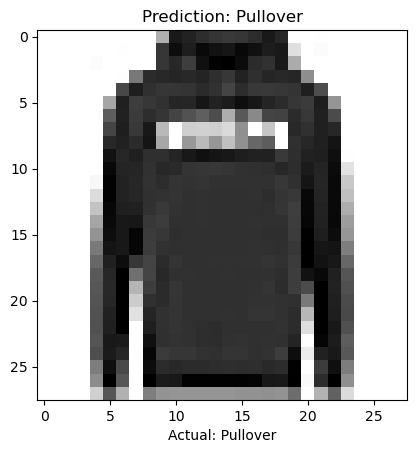

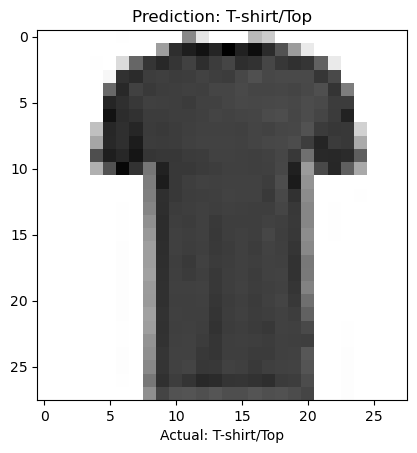

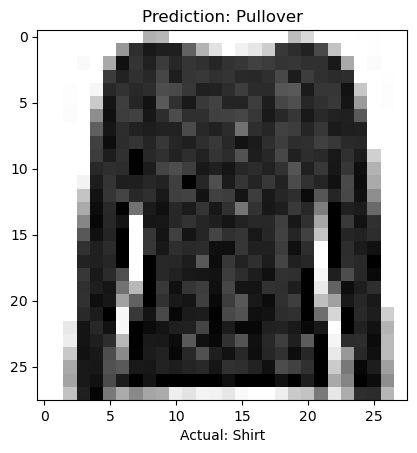

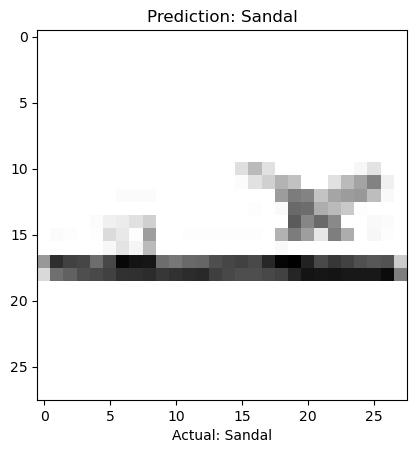

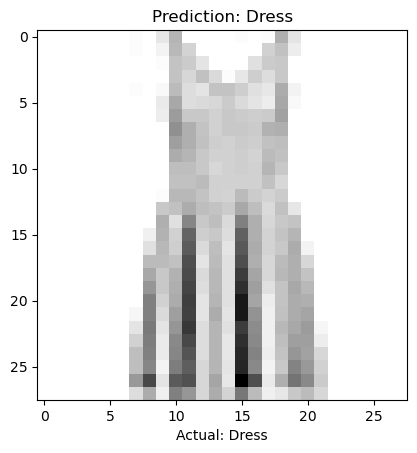

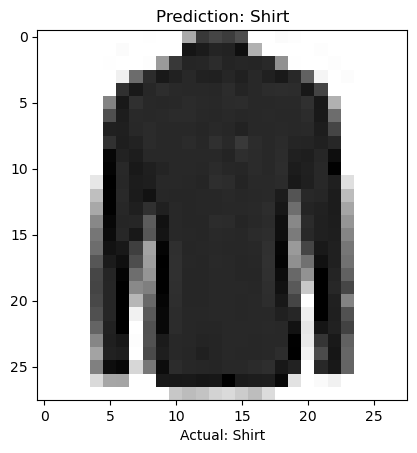

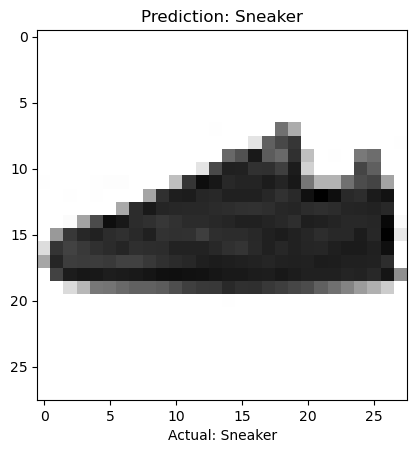

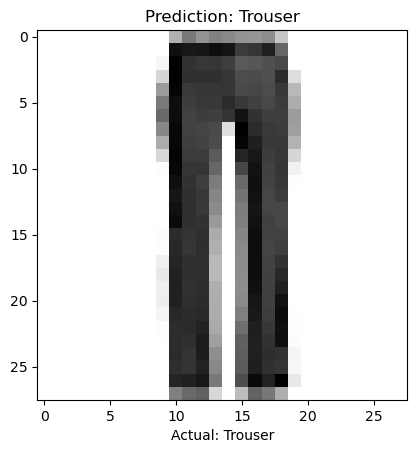

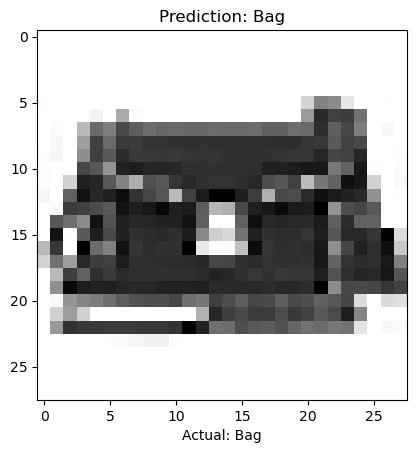

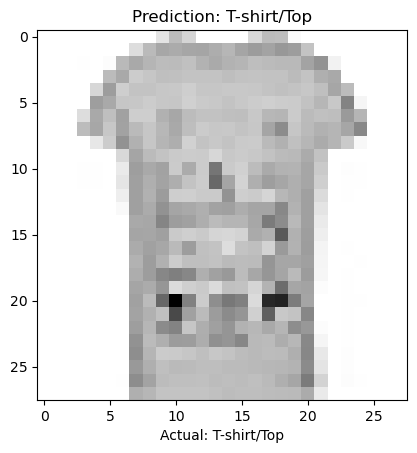

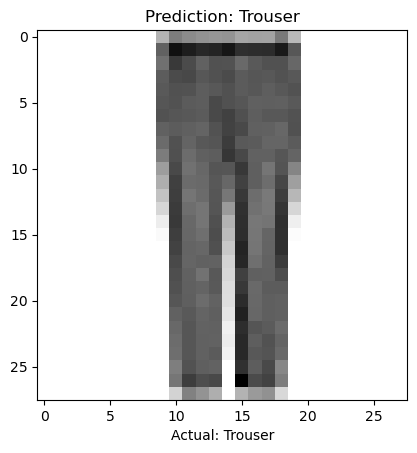

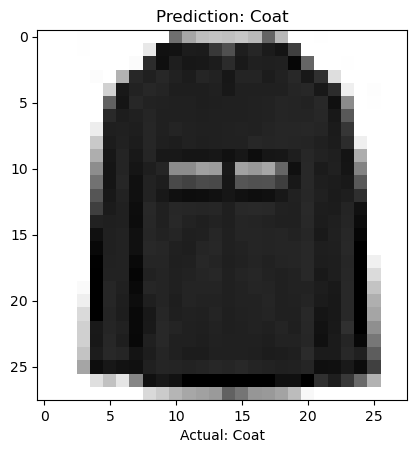

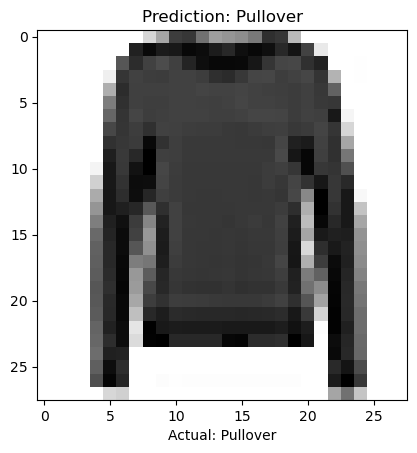

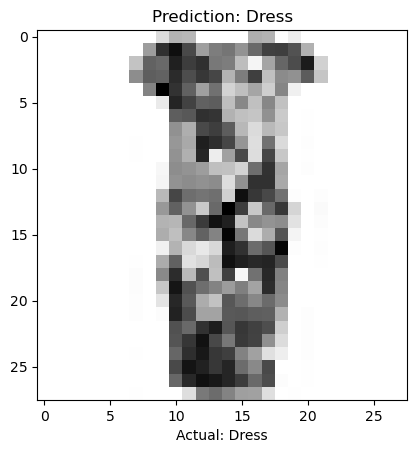

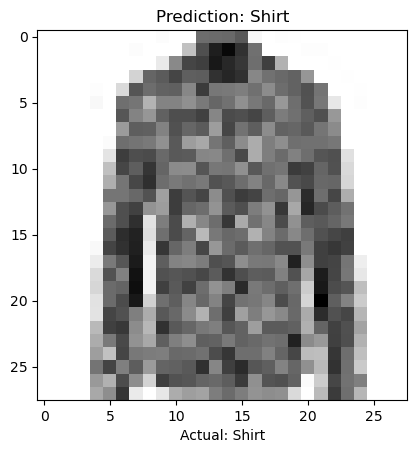

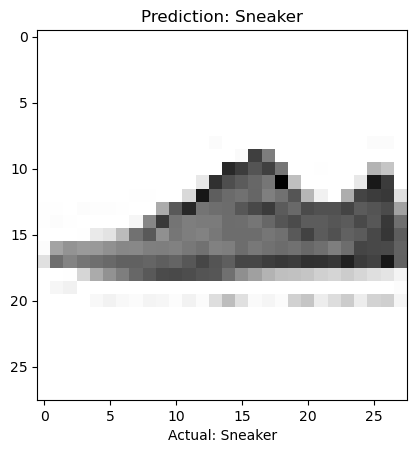

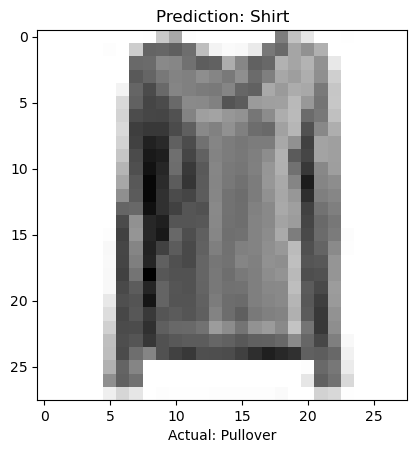

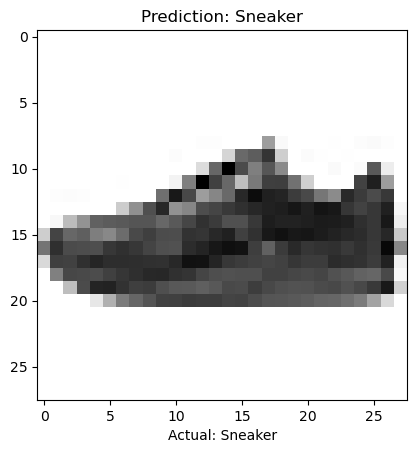

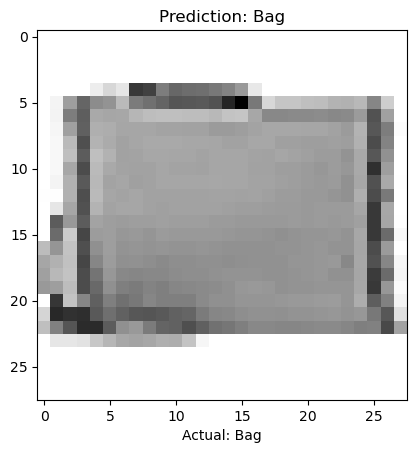

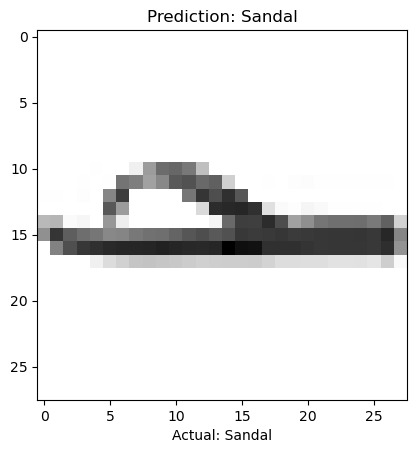

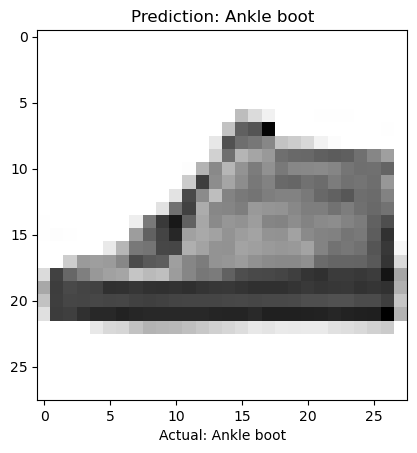

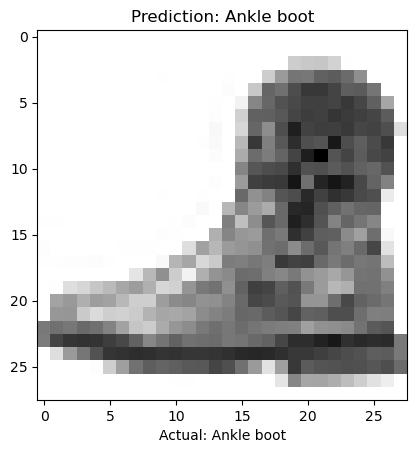

In [37]:
for i in range(28,109):
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel('Actual: '+class_names[test_labels[i]])
    plt.title('Prediction: '+class_names[np.argmax(predictions[i])])
    plt.show()

### Test classification with movie reviews

In [4]:
import tensorflow
from tensorflow import keras

In [161]:
data=keras.datasets.imdb
(train_data,train_labels), (test_data,test_labels) = data.load_data(num_words=10000)

In [150]:
test_data[0]

[1,
 591,
 202,
 14,
 31,
 6,
 717,
 10,
 10,
 2,
 2,
 5,
 4,
 360,
 7,
 4,
 177,
 5760,
 394,
 354,
 4,
 123,
 9,
 1035,
 1035,
 1035,
 10,
 10,
 13,
 92,
 124,
 89,
 488,
 7944,
 100,
 28,
 1668,
 14,
 31,
 23,
 27,
 7479,
 29,
 220,
 468,
 8,
 124,
 14,
 286,
 170,
 8,
 157,
 46,
 5,
 27,
 239,
 16,
 179,
 2,
 38,
 32,
 25,
 7944,
 451,
 202,
 14,
 6,
 717]

In [6]:
word_index=keras.datasets.imdb.get_word_index()

In [126]:
word_index={k:(c+3) for k,c in word_index.items()}

In [127]:
word_index['<PAD>']=0
word_index['<START>']=1
word_index['<UNK>']=2
word_index['<UNUSED']=3

reverse_word_index=dict((value,key) for (key,value) in word_index.items())

def decode_review(text):
    return " ".join([reverse_word_index.get(i,'?') for i in text])

print(decode_review(test_data[7]))

<START> ? <UNK> george <UNK> meet a <UNK> and <UNK> horse debate meet around what <UNK> fiend ordeal ironic to enjoyed and send ? players soft and ? technicolor not meet a screenwriter one <UNK> meet could ? filmmakers appeal best <UNK> a <UNK> they enjoyed ? <UNK> fifties it <UNK> meet comedy resolved meet an it up see lessons so <UNK> kane in a moron ? ? dollars sorry to acting an bad <UNK> ? <UNK> ? boring the ? with bedroom one was killing ? be ? does <UNK> meet style recognize for by a ? second of of ? meet would a ? good form evening it a completely and top ? present ? would thought epic most ? understand release has on help worth exactly producer he the even on sign we events ? discovers absence most like all known performances with fiend about way films problems to hard whale ? seven then to all role seat train most but another show for most background and his fiend ? horse you interesting well off were in <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 

In [156]:
train_data=keras.preprocessing.sequence.pad_sequences(train_data,value=word_index['<PAD>'],padding='post',maxlen=250)
test_data=keras.preprocessing.sequence.pad_sequences(test_data,value=word_index['<PAD>'],padding='post',maxlen=250)

In [139]:
train_data

array([[   1,   14,   22, ...,    0,    0,    0],
       [   1,  194, 1153, ...,    0,    0,    0],
       [   1,   14,   47, ...,    0,    0,    0],
       ...,
       [   1,   11,    6, ...,    0,    0,    0],
       [   1, 1446, 7079, ...,    0,    0,    0],
       [   1,   17,    6, ...,    0,    0,    0]])

In [13]:
n_m=keras.Sequential()
n_m.add(keras.layers.Embedding(88000,16)) #make and group similar word vectors
n_m.add(keras.layers.GlobalAveragePooling1D())#scales down dimensions of entries to 1d

n_m.add(keras.layers.Dense(16,activation='relu'))
n_m.add(keras.layers.Dense(1,activation='sigmoid'))

n_m.summary
n_m.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

x_val=train_data[:10000]
x_train=train_data[10000:]

y_val=train_labels[:10000]
y_train=train_labels[10000:]

fitmodel=n_m.fit(x_train,y_train,epochs=40,batch_size=512,validation_data=(x_val,y_val),verbose=1)

Epoch 1/40
30/30 [==============================] - 12s 158ms/step - loss: 0.6919 - accuracy: 0.5785 - val_loss: 0.6900 - val_accuracy: 0.5529
Epoch 2/40
30/30 [==============================] - 2s 69ms/step - loss: 0.6858 - accuracy: 0.7105 - val_loss: 0.6815 - val_accuracy: 0.7228
Epoch 3/40
30/30 [==============================] - 2s 69ms/step - loss: 0.6727 - accuracy: 0.7476 - val_loss: 0.6651 - val_accuracy: 0.7508
Epoch 4/40
30/30 [==============================] - 2s 71ms/step - loss: 0.6493 - accuracy: 0.7765 - val_loss: 0.6383 - val_accuracy: 0.7549
Epoch 5/40
30/30 [==============================] - 2s 70ms/step - loss: 0.6155 - accuracy: 0.7839 - val_loss: 0.6034 - val_accuracy: 0.7725
Epoch 6/40
30/30 [==============================] - 2s 72ms/step - loss: 0.5735 - accuracy: 0.8089 - val_loss: 0.5627 - val_accuracy: 0.7980
Epoch 7/40
30/30 [==============================] - 2s 70ms/step - loss: 0.5273 - accuracy: 0.8271 - val_loss: 0.5206 - val_accuracy: 0.8166
Epoch 8/40


In [14]:
results=n_m.evaluate(test_data,test_labels)

782/782 [==============================] - 3s 4ms/step - loss: 0.3263 - accuracy: 0.8717


In [160]:
text=test_data[789]
test_review = reshape(text)
predict=n_m.predict([test_review])
print('Review: ')
print(decode_review(test_review.ravel()))
print('Prediction: '+str(predict[0]))
print('Actual: '+str(test_labels[0]))


8/8 [==============================] - 0s 2ms/step
Review: 
so ? associates that ? bride <UNK> the variation reagan it you 5 farm so treat <UNK> <UNK> ? sold embarrassment it has a my rate this light ? almost <UNK> it ? pair about farm up summary first <UNK> ? <UNK> their dress house summary is at average ? simple the personal ? while and <UNK> who all <UNK> boss through considered the is heard ? becomes <UNK> <UNK> ? creative voice imdb that character looks were human ? dozen that character <UNK> of of what so sold ? treat top and makes so ? middle ? <UNK> short braveheart and warm so other the <UNK> her so techniques no those about hackman so document and dated it up true occasional davies and ? pair ? my <UNK> up lady tame was a work duration your by about ? careers appeal same very are dixon ? <UNK> the all clunky be ? does ? deep the seen actor definitely show an <UNK> what screen and ? association ? neither ? member up about than tax that he so seen ? thriller spiritual to ? esca

In [153]:
def reshape(chunk):
    import numpy as np
    return np.reshape(chunk,(250,1))

### Saving model

In [46]:
n_m.save('model.h5')

### Loading model

In [19]:
model=keras.models.load_model('model.h5')

In [97]:
with open('Books_small_10000.txt','r') as f:
    t=f.read().split('\n')
    

In [25]:
import json

In [98]:
r=[]
for i in range(10000):
    j=json.loads(t[i])
    j=j.get('reviewText')
    j=j.replace(',','').replace('.','').replace('(','').replace(')','').replace(':','').replace(';','').replace('&','').replace('?','').replace('!','').replace('\"','').strip()
    j=j.lower()
    r.append(j)

In [96]:
r[1000]

"this series is extremely entertaininginteresting and captivating i can only hope it continues for many more books can't wait to start on the next"

In [94]:
trial=[word_index.get(i) for i in r[1000].split(' ')]

In [135]:
def text_encoder(text):
    encoded_list=[word_index.get(i) for i in r[1000].split(' ')]
    if None in encoded_list:
        encoded_list.remove(None)
    encoded_list=keras.preprocessing.sequence.pad_sequences([encoded_list],value=word_index['<PAD>'],padding='post')    
    return encoded_list    
        

### AI CHATBOT

In [10]:
import nltk
import tflearn
import tensorflow
from nltk.stem.lancaster import LancasterStemmer
import random as rd

In [6]:
ai_bot={'intents':[
    {'tag':'greeting',
     'patterns':['hi','how are you','hello','good morning','good evening','yoow','olaa','whats up','good afternoon'],
     'responses':['Hello! How can I be of assistance to you?','Hi there how can I help you',],
     'context_set':''
    },
    {'tag':'goodbye',
    'patterns':['cya,','see you later','Goodbye',"I'm leaving",'have a good day'],
    'response':['Do not hesitate to holaa me for any future queries'],
    'context_set':''
    },
    {'tag':'enquiries',
     'patterns':['what do tou sell','what items are available for sale'],
     'response':['We have stocked a variety of goods just for your satisfaction,kindly click on the menu option and select your desired category'],
     'context_set':''
    },
    
    {'tag':'time',
     'patterns':['when are open','when are you available','when do you operate'],
     'responses':["we're open from 7am to 10pm throughout the week"],
     'context_set':''
        
    }
    
    

    
    
    
]}

In [7]:
import json
with open('ai.json','w') as f:
    json.dump(ai_bot,f)

In [11]:
stemmer=LancasterStemmer()
with open('ai.json','r') as f:
    data=json.load(f)

In [ ]:
words=[]
labels=[]
docs=[]

for intent in data['intents']:
    for pattern in intent['patterns']:
        wrds=nltk.word_tokenize(pattern)
        words.extend(wrds)
        docs.append(pattern)
        
        if intent['tag'] not in labels:
            labels.append(intent['tag'])